In [2]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, lowResDefecitRestoration, noisyDefecitRestoration, utopianRestoration, greedyFlowRestoration, bfsFlowRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
# import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [5]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "paper_repro/habitat.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "paper_repro/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "paper_repro/restored_terrain.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "paper_repro/repop.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "paper_repro/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "paper_repro/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "paper_repro/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "paper_repro/grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "paper_repro/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "paper_repro/grad_utopian.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "paper_repro/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "paper_repro/death.tif")
LOW_RES_DEATH_PATH = os.path.join(DATA_PATH, "paper_repro/lowres_death.tif")

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, permiability=0.98)
greedyFlowOptimizer = greedyFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100)
bfsFlowOptimizer = bfsFlowRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 100)

In [9]:
# limited greedy Flow restoration
bfsFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40)
permiability_restored = 74.81319707866422
# permiability_restored = bfsFlowOptimizer.restore()
# bfsFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {bfsFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Connectivity/permiability_restored: {round(bfsFlowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")
print(f"Connectivity/pixels restored: {round(bfsFlowOptimizer.get_delta_connectivity()/bfsFlowOptimizer.pixels, 2)}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


KeyboardInterrupt: 

In [7]:
TERRAIN_CHANGED_BFS = os.path.join(DATA_PATH, "paper_repro/changed_terrain_flow_bfs.tif")
CONNECTIVITY_DIFF_BFS = os.path.join(DATA_PATH, "paper_repro/connectivity_diff_flow_bfs.tif")

# paint changed terrain pixels
bfsFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_BFS, value=1)
# view diff of before and after
bfsFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_BFS)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [8]:
# limited greedy Flow restoration
permiability_restored = greedyFlowOptimizer.restore()
greedyFlowOptimizer.run_connectivity(gap_crossing=2, num_gaps=40, restored=True)
print(f"Delta connectivity: {greedyFlowOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Connectivity/permiability_restored: {round(greedyFlowOptimizer.get_delta_connectivity()/permiability_restored, 2)}")
print(f"Connectivity/pixels restored: {round(greedyFlowOptimizer.get_delta_connectivity()/greedyFlowOptimizer.pixels, 2)}")

TERRAIN_CHANGED_GREEDY = os.path.join(DATA_PATH, "paper_repro/changed_terrain_flow_greedy.tif")
CONNECTIVITY_DIFF_GREEDY = os.path.join(DATA_PATH, "paper_repro/connectivity_diff_flow_greedy.tif")

# paint changed terrain pixels
greedyFlowOptimizer.paint_changed_terrain_geotiff(TERRAIN_CHANGED_GREEDY, value=1)
# view diff of before and after
greedyFlowOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF_GREEDY)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
defecitOptimizer.run_connectivity()
permiability_restored = defecitOptimizer.restore()
defecitOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {defecitOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {defecitOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {defecitOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 26956
Permiability Restored: 48.65635038056204
Percent connectivity changed: 0.00015777556632888673%
Connectivity/permiability_restored: 554.0078487014674


In [4]:
with GeoTiff.from_file(HABITAT_PATH) as hab:
    print(hab.height)
    print(hab.width)

5377
3716


In [3]:
lowResDefecitRestoration500 = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 19, 2, 50)

# lowResDefecitRestoration500.run_connectivity()
permiability_restored = lowResDefecitRestoration500.restore()
lowResDefecitRestoration500.run_connectivity(restored=True)
print(f"Delta connectivity: {lowResDefecitRestoration500.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResDefecitRestoration500.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResDefecitRestoration500.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


x: 9158, y: 144
terrain_geotiff.height: 5377
terrain_geotiff.width: 3716


IndexError: index 0 is out of bounds for axis 0 with size 0

In [4]:
noisyOptimizer.run_connectivity()
noisyOptimizer.run_noisy_connectivity()
permiability_restored = noisyOptimizer.restore()
noisyOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {noisyOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {noisyOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {noisyOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 2731
Permiability Restored: 48.10773723554741
Percent connectivity changed: 1.598475558852165e-05%
Connectivity/permiability_restored: 56.76841516424576


In [5]:
noisyOptimizer.run_connectivity()

# results converge to denoised output as randomization decreases
for rand in [1, 25, 50, 75, 100]:
    print(f"rand divisor = {rand}")
    noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH, rand_divisor=rand)
    noisyOptimizer.run_noisy_connectivity()
    permiability_restored = noisyOptimizer.restore()
    noisyOptimizer.run_connectivity(restored=True)
    print(f"Delta connectivity: {noisyOptimizer.get_delta_connectivity()}")
    print(f"Permiability Restored: {permiability_restored}")
    print(f"Percent connectivity changed: {noisyOptimizer.get_connectivity_percent_changed()}%")
    print(f"Connectivity/permiability_restored: {noisyOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


rand divisor = 1


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3310
Permiability Restored: 47.81144526497808
Percent connectivity changed: 1.9373687659467837e-05%
Connectivity/permiability_restored: 69.2302853773922
rand divisor = 25


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 2728
Permiability Restored: 48.04432117826275
Percent connectivity changed: 1.5967196354993434e-05%
Connectivity/permiability_restored: 56.78090423794479
rand divisor = 50


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3251
Permiability Restored: 48.12145986283209
Percent connectivity changed: 1.9028356066746205e-05%
Connectivity/permiability_restored: 67.55821642291858
rand divisor = 75


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 3251
Permiability Restored: 48.13319708883209
Percent connectivity changed: 1.9028356066746205e-05%
Connectivity/permiability_restored: 67.54174242779106
rand divisor = 100


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 2724
Permiability Restored: 48.205547454547414
Percent connectivity changed: 1.5943784043622476e-05%
Connectivity/permiability_restored: 56.50801917701351


In [10]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()
permiability_restored = utopianOptimizer.restore()
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(2347, 5275): 57, (864, 2172): 56, (1058, 2714): 56, (2227, 4828): 56, (1179, 1203): 56, (2224, 4823): 55, (1440, 2271): 55, (1310, 1240): 55, (976, 1566): 55, (1718, 2717): 55, (1799, 2703): 55, (1313, 1237): 55, (1184, 1201): 55, (1305, 1247): 55, (1185, 1201): 55, (1009, 2051): 55, (1279, 313): 55, (1303, 251): 55, (1032, 1292): 55, (1302, 250): 55, (1305, 250): 55, (1414, 2074): 54, (1301, 250): 54, (3698, 3460): 54, (1397, 1747): 54, (886, 1429): 54, (2227, 4829): 54, (1470, 1843): 54, (3485, 3469): 54}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1271
Permiability Restored: 25.543795622700728
Percent connectivity changed: 7.43926193812194e-06%
Connectivity/permiability_restored: 49.75767966411634


<Figure size 500x500 with 0 Axes>

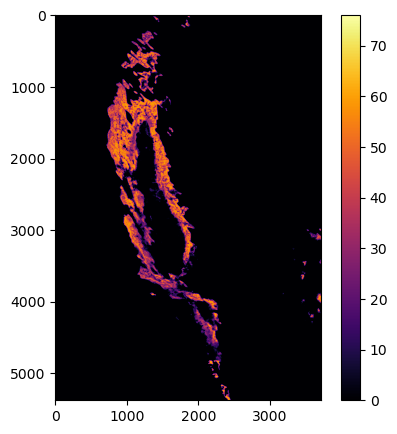

<Figure size 500x500 with 0 Axes>

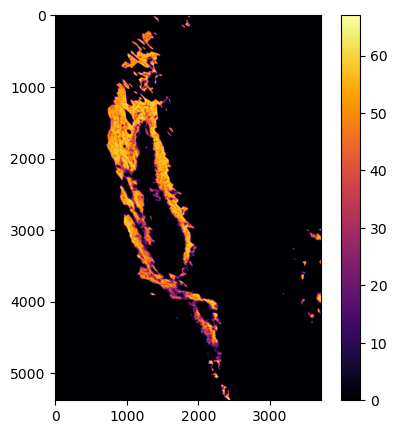

<Figure size 500x500 with 0 Axes>

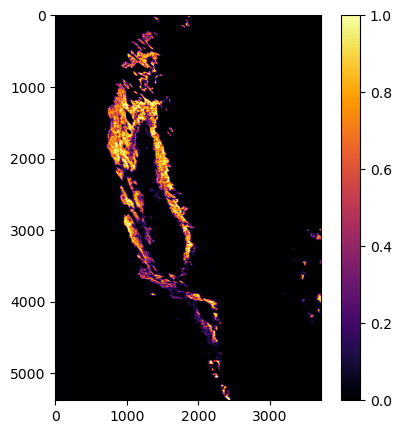

In [4]:
with GeoTiff.from_file(utopianOptimizer.flow_fn) as flow:
    flow.draw_geotiff()
with GeoTiff.from_file(utopianOptimizer.utopian_flow_fn) as flow:
    flow.draw_geotiff()
with GeoTiff.from_file(utopianOptimizer.habitat_fn) as hab:
    hab.draw_geotiff()